In [1]:
import pandas as pd
from math import pi
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [4]:
def euler(function,x0,y0,h,epsilon,b):
    x = [x0]
    y = [y0]
    while x[-1] <= b:
        y1 = y[-1] + h*function(x[-1],y[-1])
        y1_ = y[-1] + h/2*function(x[-1],y[-1])
        y2_ = y1_ + h/2*function(x[-1] + h/2,y1_)
        if abs(y2_ - y1) > epsilon:
            h = h/2
            y.append(y2_)
        else:
            y.append(y1)
        x.append(x[-1]+h)
    return pd.DataFrame({'xi': x, 'yi': y}) 

In [2]:
def function(x,y):
    return  y/x + x*(x**2 - y**2)**0.5

In [5]:
my_answer = euler(function,pi**0.5,pi**0.5,h,epsilon,pi**0.5 + 0.5)
my_answer

,xi,yi
0,1.772454,1.772454
1,1.872454,1.872454
2,1.972454,1.972454
3,2.072454,2.072454
4,2.172454,2.172454
5,2.272454,2.272454


In [7]:
z = odeint(function,pi**0.5,list(my_answer.xi))

In [8]:
my_answer['scipy'] = z

In [9]:
my_answer['error'] = abs(my_answer['scipy'] - my_answer['yi'])

In [10]:
my_answer

,xi,yi,scipy,error
0,1.772454,1.772454,1.772454,0.0
1,1.872454,1.872454,1.872454,0.0
2,1.972454,1.972454,1.972454,0.0
3,2.072454,2.072454,2.072454,0.0
4,2.172454,2.172454,2.172454,0.0
5,2.272454,2.272454,2.272454,0.0


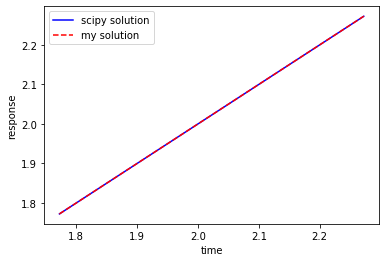

In [12]:
plt.plot(list(my_answer.xi),z,'b-',label=r'scipy solution')
plt.plot(list(my_answer.xi),list(my_answer.yi),'r--',label=r'my solution')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()